<a href="https://colab.research.google.com/github/blaze2204/data_science/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
ipl_df = pd.read_csv("all_season_summary.csv")

In [3]:
ipl_df.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL FIRST,131/5,...,"Ruturaj Gaikwad (UKN),Devon Conway (UKN),Robin...","Ajinkya Rahane (UKN),Venkatesh Iyer (AR),Nitis...","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",26 March 2022 - night match (20-over match),Anil Chaudhary,Nitin Menon,Virender Sharma,Manu Nayyar,Chirra Ravikanthreddy
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL FIRST,177/5,...,"Prithvi Shaw (UKN),Tim Seifert (UKN),Mandeep S...","Rohit Sharma (UKN),Ishan Kishan (WK),Anmolpree...","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",27 March 2022 - day/night match (20-over match),Saiyed Khalid,Rod Tucker,Jayaraman Madanagopal,Prakash Bhatt,Nitin Pandit
2,2022,1304049,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,KXIP,BOWL FIRST,205/2,...,"Mayank Agarwal (UKN),Shikhar Dhawan (UKN),Bhan...","Faf du Plessis (UKN),Anuj Rawat (UKN),Virat Ko...","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",27 March 2022 - night match (20-over match),Yeshwant Barde,Nitin Menon,Anil Chaudhary,Manu Nayyar,Rohan Pandit
3,2022,1304050,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL FIRST,158/6,...,"Shubman Gill (UKN),Matthew Wade (WK),Vijay Sha...","KL Rahul (UKN),Quinton de Kock (WK),Evin Lewis...","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",28 March 2022 - night match (20-over match),Pashchim Pathak,Virender Sharma,Rod Tucker,Daniel Manohar,Sadashiv Iyer
4,2022,1304051,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL FIRST,210/6,...,"Kane Williamson (UKN),Abhishek Sharma (AR),Rah...","Jos Buttler (UKN),Yashasvi Jaiswal (UKN),Sanju...","Sanju Samson,Devdutt Padikkal","Yuzvendra Chahal,Prasidh Krishna",29 March 2022 - night match (20-over match),Ulhas Gandhe,Bruce Oxenford,KN Ananthapadmanabhan,Shakti Singh,Saidharshan Kumar


In [4]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            958 non-null    int64  
 1   id                958 non-null    int64  
 2   name              958 non-null    object 
 3   short_name        958 non-null    object 
 4   description       958 non-null    object 
 5   home_team         958 non-null    object 
 6   away_team         958 non-null    object 
 7   toss_won          958 non-null    object 
 8   decision          958 non-null    object 
 9   1st_inning_score  950 non-null    object 
 10  2nd_inning_score  948 non-null    object 
 11  home_score        950 non-null    object 
 12  away_score        948 non-null    object 
 13  winner            958 non-null    object 
 14  result            958 non-null    object 
 15  start_date        958 non-null    object 
 16  end_date          958 non-null    object 
 1

In [5]:
ipl_df['home_team_wins_flag'] = np.where(ipl_df['home_team']==ipl_df['winner'],1,0)
ipl_df['toss_wins_flag'] = np.where(ipl_df['toss_won']==ipl_df['winner'],1,0)

In [6]:
ipl_df['home_team_wins_flag'].value_counts()

1    510
0    448
Name: home_team_wins_flag, dtype: int64

In [7]:
ipl_df['toss_wins_flag'].value_counts()

1    490
0    468
Name: toss_wins_flag, dtype: int64

In [8]:
ipl_df[['home_team_wins_flag','toss_wins_flag']].corr()

,home_team_wins_flag,toss_wins_flag
home_team_wins_flag,1.000000,0.000603
toss_wins_flag,0.000603,1.000000


In [9]:
ipl_df_2 = ipl_df.groupby('season').agg({'home_team_wins_flag':'sum','toss_wins_flag':'sum','id':'count'}).reset_index()

In [10]:
ipl_df_2['per_home_wins']= ipl_df_2['home_team_wins_flag']/ipl_df_2['id']
ipl_df_2['per_toss_wins']= ipl_df_2['toss_wins_flag']/ipl_df_2['id']

In [11]:
ipl_df_2.head(6)

,season,home_team_wins_flag,toss_wins_flag,id,per_home_wins,per_toss_wins
0,2008,30,28,59,0.508475,0.474576
1,2009,33,34,59,0.559322,0.576271
2,2010,34,32,60,0.566667,0.533333
3,2011,39,38,74,0.527027,0.513514
4,2012,33,33,76,0.434211,0.434211
5,2013,54,36,76,0.710526,0.473684


<BarContainer object of 15 artists>

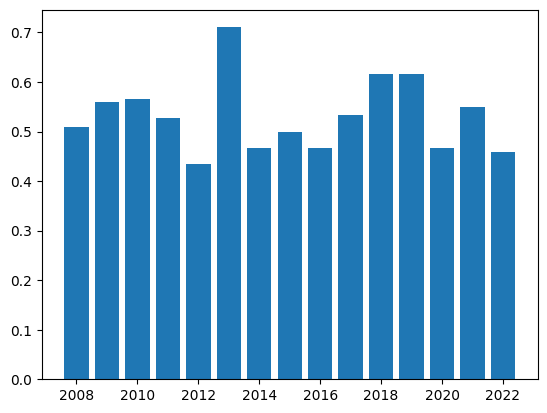

In [12]:
plt.bar(ipl_df_2["season"],ipl_df_2['per_home_wins'])

<BarContainer object of 15 artists>

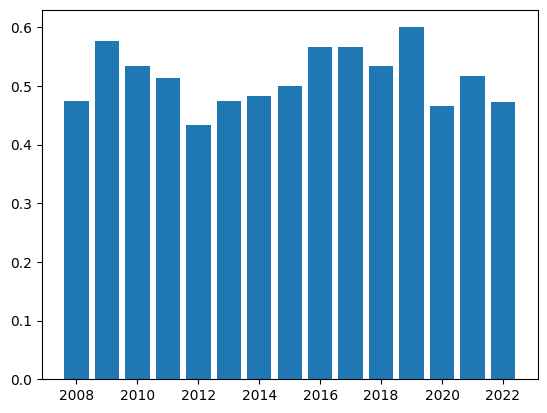

In [13]:
plt.bar(ipl_df_2["season"],ipl_df_2['per_toss_wins'])

In [14]:
ipl_df.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire',
       'home_team_wins_flag', 'toss_wins_flag'],
      dtype='object')

In [49]:
ipl_df_data = ipl_df.copy()

In [50]:
ipl_df_data['win'] = np.where(ipl_df_data['winner']==ipl_df_data['home_team'],1,0)

In [51]:
# Sorting the dataframe in ascending order according to the dates
ipl_df_data = ipl_df_data.sort_values(by='start_date').reset_index()
ipl_df_data['head_to_head_win_percentage'] = 0.0

# Calculate head-to-head win percentage for each match
for i in range(0, len(ipl_df_data)):
    # Get current match teams
    team1 = ipl_df_data.loc[i, 'home_team']
    team2 = ipl_df_data.loc[i, 'away_team']

    # Get previous matches between these teams
    prev_matches = ipl_df_data.iloc[:i][((ipl_df_data['home_team'] == team1) & (ipl_df_data['away_team'] == team2)) |
                                ((ipl_df_data['home_team'] == team2) & (ipl_df_data['away_team'] == team1))]


    if len(prev_matches)<=3:
        continue

    # Calculate head-to-head win percentage for team1
    head_to_head_win_percentage = prev_matches['winner'].apply(lambda x: 1 if x == team1 else 0).mean()

    # Store head-to-head win percentage
    ipl_df_data.loc[i, 'head_to_head_win_percentage'] = head_to_head_win_percentage

In [52]:
ipl_df_data['venue_win_percentage'] = 0.0

# Calculate venue win percentage for each match
for i in range(0, len(ipl_df_data)):
    # Get current match team and venue
    team, venue = ipl_df_data.loc[i, ['home_team', 'venue_id']]

    # Get previous matches at the same venue
    prev_matches = ipl_df_data.iloc[:i][((ipl_df_data['home_team'] == team) | (ipl_df_data['away_team'] == team)) & (ipl_df_data['venue_id'] == venue)]

    if len(prev_matches)<=3:
        continue

    # Calculate win percentage
    win_percentage = prev_matches['win'].mean()

    # Store win percentage
    ipl_df_data.loc[i, 'venue_win_percentage'] = win_percentage

In [53]:
ipl_df_data['toss_winner'] = np.where(ipl_df_data['toss_won']==ipl_df_data['winner'],1,0)
ipl_df_data['toss_win_percentage'] = 0.0

# Calculate toss win percentage for each match
for i in range(0, len(ipl_df_data)):
    # Get current match team
    team = ipl_df_data.loc[i, 'home_team']

    # Get previous matches for the same team
    prev_matches = ipl_df_data.iloc[:i][((ipl_df_data['home_team'] == team) | (ipl_df_data['away_team'] == team)) & (ipl_df_data['toss_won']==team)]

    if len(prev_matches)<=3:
        continue

    # Calculate toss win percentage
    toss_win_percentage = prev_matches['toss_winner'].mean()

    # Store toss win percentage
    ipl_df_data.loc[i, 'toss_win_percentage'] = toss_win_percentage


In [54]:
ipl_df_data['bat_first'] = ipl_df_data.apply(lambda row: 1 if row['decision'] == 'BAT FIRST' else 0, axis=1)
ipl_df_data['bowl_first'] = ipl_df_data.apply(lambda row: 1 if row['decision'] == 'BOWL FIRST' else 0, axis=1)
# Initialize a new column for batting first win percentage
ipl_df_data['bat_first_win_percentage'] = 0.0

# Calculate batting first win percentage for each match
for i in range(1, len(ipl_df_data)):
    team = ipl_df_data.loc[i, 'home_team']

    prev_matches = ipl_df_data.iloc[:i][((ipl_df_data['home_team'] == team) | (ipl_df_data['away_team'] == team)) & (((ipl_df_data['bat_first'] == 1) & (ipl_df_data['toss_won'] == team)) |((ipl_df_data['toss_won'] != team) & (ipl_df_data['bowl_first'] == 1)))]
    prev_matches['bat_first_win'] = np.where(prev_matches['winner']==team,1,0)
    if len(prev_matches)<=3:
        continue
    bat_first_win_percentage = prev_matches['bat_first_win'].mean()


    # Store batting first win percentage
    ipl_df_data.loc[i, 'bat_first_win_percentage'] = bat_first_win_percentage

In [55]:
# Initialize a new column for bowling first win percentage
ipl_df_data['bowl_first_win_percentage'] = 0.0

# Calculate bowling first win percentage for each match
for i in range(1, len(ipl_df_data)):
    team = ipl_df_data.loc[i, 'home_team']

    prev_matches = ipl_df_data.iloc[:i][((ipl_df_data['home_team'] == team) | (ipl_df_data['away_team'] == team)) & (((ipl_df_data['bowl_first'] == 1) & (ipl_df_data['toss_won'] == team)) | ((ipl_df_data['toss_won'] != team) | (ipl_df_data['bat_first'] == 1))) ]

    if len(prev_matches)<=3:
        continue
    bowl_first_win_percentage = prev_matches['win'].mean()

    # Store bowling first win percentage
    ipl_df_data.loc[i, 'bowl_first_win_percentage'] = bowl_first_win_percentage

In [56]:
ipl_df_data['seasonal_win_percentage'] = 0.0

# Calculate seasonal win percentage for each match
for season in ipl_df_data['season'].unique():
    for i in ipl_df_data[ipl_df_data['season'] == season].index[0:]:
        team = ipl_df_data.loc[i, 'home_team']
        prev_matches = ipl_df_data.iloc[:i][(ipl_df_data['season'] == season) & ((ipl_df_data['home_team'] == team) | (ipl_df_data['away_team'] == team))]
        prev_matches['season_win'] = np.where(prev_matches['winner']==team,1,0)
        seasonal_win_percentage = prev_matches['season_win'].mean()
        ipl_df_data.loc[i, 'seasonal_win_percentage'] = seasonal_win_percentage
    if len(prev_matches)<=3:
        continue

In [57]:
ipl_df_data.describe()

,index,season,id,venue_id,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,...,win,head_to_head_win_percentage,venue_win_percentage,toss_winner,toss_win_percentage,bat_first,bowl_first,bat_first_win_percentage,bowl_first_win_percentage,seasonal_win_percentage
count,958.000000,958.000000,9.580000e+02,958.000000,950.000000,950.000000,950.000000,950.000000,948.000000,948.000000,...,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,895.000000
mean,478.500000,2014.973904,8.283838e+05,122107.409186,19.071368,157.129474,5.763158,19.193684,19.051793,154.531646,...,0.532359,0.359235,0.371333,0.511482,0.483027,0.366388,0.626305,0.409582,0.510647,0.508594
std,276.695079,4.316664,3.376360e+05,147116.606610,2.128892,31.491834,2.409961,5.799455,2.158935,30.879130,...,0.499212,0.253790,0.273144,0.500129,0.168009,0.482069,0.484037,0.152291,0.115691,0.238268
min,0.000000,2008.000000,3.359820e+05,57851.000000,1.100000,2.000000,0.000000,0.000000,3.200000,41.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,239.250000,2011.000000,5.012592e+05,58008.000000,19.200000,138.000000,4.000000,15.000000,19.100000,136.000000,...,0.000000,0.000000,0.000000,0.000000,0.444444,0.000000,0.000000,0.373970,0.500000,0.363636
50%,478.500000,2015.000000,8.297340e+05,58162.000000,20.000000,159.000000,6.000000,19.000000,20.000000,156.500000,...,1.000000,0.428571,0.448276,1.000000,0.510310,0.000000,1.000000,0.422535,0.527780,0.500000
75%,717.750000,2019.000000,1.175370e+06,59120.000000,20.000000,178.000000,8.000000,23.000000,20.000000,175.000000,...,1.000000,0.551293,0.600000,1.000000,0.571429,1.000000,1.000000,0.500000,0.562500,0.666667
max,957.000000,2022.000000,1.312200e+06,601879.000000,20.000000,263.000000,10.000000,42.000000,20.000000,245.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.875000,0.800000,1.000000


In [88]:
ipl_df_data[ipl_df_data['id']==419155][['head_to_head_win_percentage','venue_win_percentage','toss_win_percentage','bat_first_win_percentage','bowl_first_win_percentage','seasonal_win_percentage','win']]

,head_to_head_win_percentage,venue_win_percentage,toss_win_percentage,bat_first_win_percentage,bowl_first_win_percentage,seasonal_win_percentage,win
167,0.6,0.615385,0.611111,0.541667,0.534884,0.583333,0


In [59]:
ipl_df_data.columns

Index(['index', 'season', 'id', 'name', 'short_name', 'description',
       'home_team', 'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire',
       'home_team_wins_flag', 'toss_wins_flag', 'win',
       'head_to_head_win_percentage', 'venue_win_percentage', 'toss_winner',
       'toss_win_percentage', 'bat_first', 'bowl_first',
       'bat_first_win_percentage', 'bowl_first_win_percentage',
       'seasonal_win_percentage', 'tea

In [79]:
tf = ipl_df_data[['head_to_head_win_percentage','venue_win_percentage','toss_win_percentage','seasonal_win_percentage','bat_first_win_percentage','bowl_first_win_percentage','win']]

In [80]:
tf = tf.fillna(0)

In [82]:
from sklearn.model_selection import train_test_split

X = tf.drop('win', axis=1)
y = tf['win']

# Split the data into training and test sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Accuracy:  0.4947916666666667


In [83]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

print("Model Accuracy: ", model.score(X_test, y_test))


Model Accuracy:  0.546875


In [86]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

print("Model Accuracy: ", model.score(X_test, y_test))


Model Accuracy:  0.53125


In [87]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the accuracy on the test set
print("Decision Tree Model Accuracy: ", model.score(X_test, y_test))


Decision Tree Model Accuracy:  0.5


In [85]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

print("Model Accuracy: ", model.score(X_test, y_test))


Model Accuracy:  0.5052083333333334


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Initialize Logistic Regression
log_reg = LogisticRegression()

# Specify parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

# Create Grid Search object
clf = GridSearchCV(log_reg, param_grid)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Print the best parameters and accuracy on the test set
print("Best parameters for Logistic Regression: ", clf.best_params_)
print("Logistic Regression Accuracy: ", clf.score(X_test, y_test))


Best parameters for Logistic Regression:  {'C': 1, 'penalty': 'l2'}
Logistic Regression Accuracy:  0.578125
